In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a2c6cd16db8e2c769f32d3b92bc8712d


In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | esperance
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | qasigiannguit
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | klaksvik
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | codrington
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | clyde river
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | eirunepe
Processing Record 20 of Set 1 | bataipora
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | esmeralda

Processing Record 40 of Set 4 | bambous virieux
Processing Record 41 of Set 4 | paso de los toros
Processing Record 42 of Set 4 | santa marta
Processing Record 43 of Set 4 | mbigou
Processing Record 44 of Set 4 | touros
Processing Record 45 of Set 4 | zavodoukovsk
Processing Record 46 of Set 4 | luderitz
Processing Record 47 of Set 4 | young
Processing Record 48 of Set 4 | carnarvon
Processing Record 49 of Set 4 | pevek
Processing Record 50 of Set 4 | aklavik
Processing Record 1 of Set 5 | bacuit
City not found. Skipping...
Processing Record 2 of Set 5 | nchelenge
Processing Record 3 of Set 5 | mitsamiouli
Processing Record 4 of Set 5 | tawang
Processing Record 5 of Set 5 | tual
Processing Record 6 of Set 5 | cravo norte
Processing Record 7 of Set 5 | saleaula
City not found. Skipping...
Processing Record 8 of Set 5 | bajo baudo
City not found. Skipping...
Processing Record 9 of Set 5 | atambua
Processing Record 10 of Set 5 | tateyama
Processing Record 11 of Set 5 | khash
Processing Re

Processing Record 31 of Set 8 | gat
Processing Record 32 of Set 8 | cumaribo
City not found. Skipping...
Processing Record 33 of Set 8 | elko
Processing Record 34 of Set 8 | kenai
Processing Record 35 of Set 8 | luganville
Processing Record 36 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 37 of Set 8 | xai-xai
Processing Record 38 of Set 8 | demyansk
Processing Record 39 of Set 8 | leningradskiy
Processing Record 40 of Set 8 | kavaratti
Processing Record 41 of Set 8 | korla
Processing Record 42 of Set 8 | mullaitivu
City not found. Skipping...
Processing Record 43 of Set 8 | yatou
Processing Record 44 of Set 8 | chicama
Processing Record 45 of Set 8 | kalabo
Processing Record 46 of Set 8 | rio grande
Processing Record 47 of Set 8 | ludvika
Processing Record 48 of Set 8 | darnah
Processing Record 49 of Set 8 | aykhal
Processing Record 50 of Set 8 | venice
Processing Record 1 of Set 9 | kitgum
Processing Record 2 of Set 9 | chagda
City not found. Skipping...
Processin

Processing Record 19 of Set 12 | nizhnyaya poyma
Processing Record 20 of Set 12 | vaijapur
Processing Record 21 of Set 12 | shumskiy
Processing Record 22 of Set 12 | carballo
Processing Record 23 of Set 12 | el vigia
Processing Record 24 of Set 12 | talcahuano
Processing Record 25 of Set 12 | zomba
Processing Record 26 of Set 12 | alcobaca
Processing Record 27 of Set 12 | bayshore gardens
Processing Record 28 of Set 12 | baruun-urt
Processing Record 29 of Set 12 | perevolotskiy
Processing Record 30 of Set 12 | agirish
Processing Record 31 of Set 12 | aybak
City not found. Skipping...
Processing Record 32 of Set 12 | rujewa
Processing Record 33 of Set 12 | vidim
Processing Record 34 of Set 12 | parabel
Processing Record 35 of Set 12 | hovd
Processing Record 36 of Set 12 | ayan
Processing Record 37 of Set 12 | iberia
Processing Record 38 of Set 12 | khani
Processing Record 39 of Set 12 | leua
Processing Record 40 of Set 12 | yibin
Processing Record 41 of Set 12 | kyle of lochalsh
City no

In [9]:
len(city_data)

559

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.74,-90.35,82.40,78,75,4.70,EC,2020-04-14 17:33:22
1,Arraial Do Cabo,-22.97,-42.03,82.40,61,3,18.34,BR,2020-04-14 17:33:22
2,Mataura,-46.19,168.86,43.00,85,73,1.01,NZ,2020-04-14 17:33:22
3,Qaanaaq,77.48,-69.36,22.53,94,100,4.38,GL,2020-04-14 17:33:22
4,Esperance,-33.87,121.90,60.80,93,100,4.70,AU,2020-04-14 17:33:22
5,Jamestown,42.10,-79.24,43.00,40,1,6.93,US,2020-04-14 17:33:22
6,Qasigiannguit,68.82,-51.19,28.40,74,75,3.36,GL,2020-04-14 17:33:22
7,Klaksvik,62.23,-6.59,44.60,100,100,14.99,FO,2020-04-14 17:33:23
8,Hithadhoo,-0.60,73.08,85.69,64,49,1.83,MV,2020-04-14 17:33:23
9,Kapaa,22.08,-159.32,71.60,100,75,1.81,US,2020-04-14 17:33:23


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2020-04-14 17:33:22,-0.74,-90.35,82.40,78,75,4.70
1,Arraial Do Cabo,BR,2020-04-14 17:33:22,-22.97,-42.03,82.40,61,3,18.34
2,Mataura,NZ,2020-04-14 17:33:22,-46.19,168.86,43.00,85,73,1.01
3,Qaanaaq,GL,2020-04-14 17:33:22,77.48,-69.36,22.53,94,100,4.38
4,Esperance,AU,2020-04-14 17:33:22,-33.87,121.90,60.80,93,100,4.70
5,Jamestown,US,2020-04-14 17:33:22,42.10,-79.24,43.00,40,1,6.93
6,Qasigiannguit,GL,2020-04-14 17:33:22,68.82,-51.19,28.40,74,75,3.36
7,Klaksvik,FO,2020-04-14 17:33:23,62.23,-6.59,44.60,100,100,14.99
8,Hithadhoo,MV,2020-04-14 17:33:23,-0.60,73.08,85.69,64,49,1.83
9,Kapaa,US,2020-04-14 17:33:23,22.08,-159.32,71.60,100,75,1.81


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")

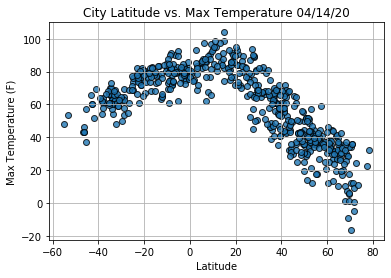

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

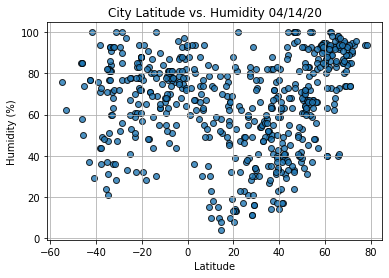

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

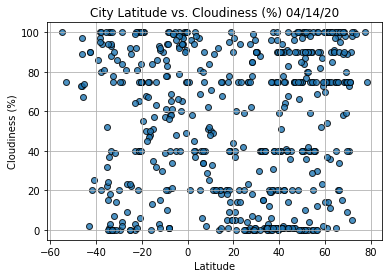

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

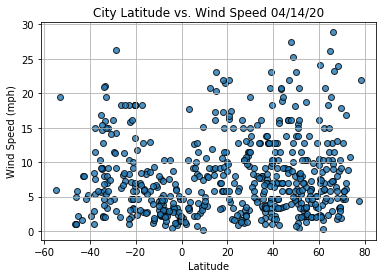

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()